In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression


In [6]:
df = pd.read_csv('chd.csv')
df.head()

,Obs,ID,AGE,agrp,CHD
0,1,1,20,1,0
1,2,2,23,1,0
2,3,3,24,1,0
3,4,4,25,1,0
4,5,5,25,1,1


<AxesSubplot:xlabel='AGE', ylabel='CHD'>

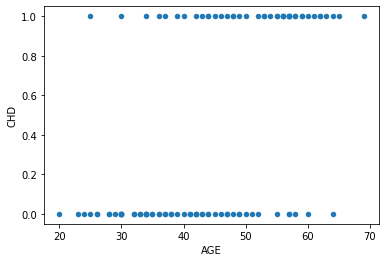

In [7]:
df.plot.scatter(x='AGE',y='CHD')

In [9]:
import statsmodels.api as sm
y= df['CHD']
X = sm.add_constant(df[['AGE']])
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.536765
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.214     
Dependent Variable: CHD              AIC:              111.3531  
Date:               2020-11-10 12:09 BIC:              116.5634  
No. Observations:   100              Log-Likelihood:   -53.677   
Df Model:           1                LL-Null:          -68.331   
Df Residuals:       98               LLR p-value:      6.1680e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -5.3095     1.1337   -4.6835   0.0000   -7.5314   -3.0875
AGE        0.1109     0.0241    4.6102   0.0000    0.0638 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [11]:
y_pred = logreg.predict(X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.74


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[45 12]
 [14 29]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        57
           1       0.71      0.67      0.69        43

    accuracy                           0.74       100
   macro avg       0.74      0.73      0.73       100
weighted avg       0.74      0.74      0.74       100



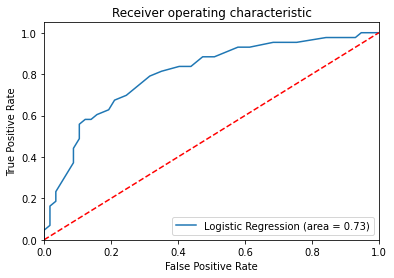

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y, logreg.predict(X))
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()